In [5]:
pip install tracywidom

  Created wheel for tracywidom: filename=TracyWidom-0.3.0-py3-none-any.whl size=11748 sha256=7050c0a84dcc06fc6139a79036f6a335257401f70f18365009f6be60f832fe7a
  Stored in directory: /root/.cache/pip/wheels/8a/b7/de/25c063ec4c03ec8de200c68295c4bd7c9a063477d90f734fec
Successfully built tracywidom


# Tarea 5
## Temas Selectos de Estadística
### Diego Ramírez Araque

## Ejercicio 1

Calculamos los parámetros de centrado y escalamiento para calcular $\theta_{\alpha}$ dados por:

\begin{align*}
\mu(p,m,n) &= 2 \log \tan(\frac{\phi+\gamma}{2}) & \sigma^{3} (p,m,n) = \frac{16}{(m+n-1)^{2}} \frac{1}{\sin^{2}(\phi + \gamma)\sin \phi \sin \gamma}
\end{align*}

en donde $\gamma,\phi$ se definen por:
\begin{align*}
\gamma &= 2  \arcsin \sqrt{ \frac{\min (p,n)-1/2}{m+n-1} } \\
\phi &= 2  \arcsin \sqrt{ \frac{\max (p,n)-1/2}{m+n-1} }
\end{align*}

Y tomamos $f_{\alpha} = 0.9793$

In [6]:
import numpy as np
from TracyWidom import TracyWidom

x = np.linspace(-10, 10, 101)
tw1 = TracyWidom(beta=1)  # allowed beta values are 1, 2, and 4
pdf = tw1.pdf(x)
cdf = tw1.cdf(x)

p = 4
n = 5
m = 42
phi = 2*np.arcsin(np.sqrt((min([p,n])-1/2)/(m+n-1)))
gamma = 2*np.arcsin(np.sqrt((max([p,n])-1/2)/(m+n-1)))
mu = 2*np.log(np.tan((phi+gamma)/2))
aux = pow(np.sin(gamma+phi),2)*np.sin(phi)*np.sin(gamma)
sigma3 = (16/pow(m+n-1,2))*(1/aux)
sigma = pow(sigma3,1/3)
theta_a = (np.exp(mu)+0.9793*sigma)/(1+np.exp(mu)+0.9793*sigma)

In [7]:
print('mu(p,m,n): \n',mu)
print('sigma(p,m,n): \n',sigma)
print('theta_a: \n',theta_a)

mu(p,m,n): 
 -0.7696258935699679
sigma(p,m,n): 
 0.3026877995501765
theta_a: 
 0.4316917587377988


En este caso obtenemos que $\theta_{\alpha} = \frac{e^{\mu+f_{\alpha}\sigma}}{1+e^{\mu+f_{\alpha}\sigma }}$ = 0.4316917587377988.

A comparación de $\theta_{obs} = 0.652$, $\theta_{\alpha}$ es una cota superior de $\theta_{obs}$ o al menos se aproximan de manera exacta y la diferencia entre estas dos es significativa. De esta forma rechazamos la Hipótesis nula por que no hay evidencia de igualdad.

In [9]:
tw1.cdf(0.9793)

0.9500003304691891

## Ejercicio 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns

* Ley de Semicírculo GUE y Tracy-Widom de orden 2.

Calculamos con ayuda del código de sesiones pasadas la Ley de Semicírculo y Tracy Widom

In [11]:
### Theoretical
def f(x):
    return 1/np.pi * np.sqrt(2-x**2) 

In [ ]:
### Numerical: GUE
n = 100
m = 100000
eig_GUE = []
k = 0
s = np.zeros([(n-1)*m])
for i in range(m):
    H_GUE = (np.random.normal(size=(n, n))+np.random.normal(size=(n, n))*1j)
    Hsy_GUE = (H_GUE + np.transpose(H_GUE).conjugate())/2.
    w_GUE,v_GUE = LA.eigh(Hsy_GUE) 
    eig_GUE.append(w_GUE)

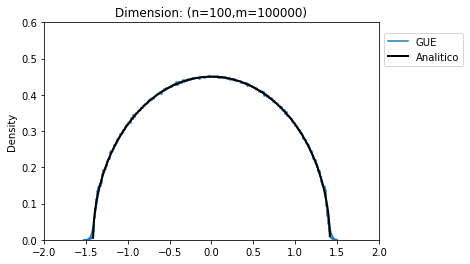

In [22]:
GUE = np.sort(np.sqrt(1/(2*n))*np.array(eig_GUE).flatten())
sns.histplot(data=GUE,stat="density", element="step", fill=False,kde=True, label='GUE')
eps = 0.0001
t = np.arange(-np.sqrt(2)+eps, np.sqrt(2)-eps, 0.001)
plt.plot(t, f(t), 'k',linewidth=2,label=r'Analitico')
plt.title('Dimension: (n='+str(n)+',m='+str(m)+')')
plt.xlim([-2,2])
plt.ylim([0,0.6])
plt.legend(loc='upper left',bbox_to_anchor = (1, .975))

In [78]:
GUE = np.array(eig_GUE).flatten()

In [79]:
eig_GUE_n = []
for k in range(len(eig_GUE)):
  eig_GUE_n.append((n**(1/6))*(eig_GUE[k]-2*np.sqrt(n)))

In [80]:
tracy_widom = [max(eig_GUE_n[i]) for i in range(len(eig_GUE))]

* Tracy Widom con eigenvalores y acumulativa

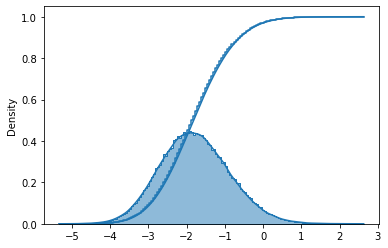

In [81]:
sns.histplot(data=tracy_widom,stat="density", element="step", fill=True,kde=True, label='GUE')
sns.histplot(data=tracy_widom,stat="density", element="step", fill=False,kde=True, label='GUE',cumulative=True)
#plt.xlim([-6,4])
#plt.ylim([0,1])

* Estadístico $\hat{R}$ para $h_{1} - h_{0}=1,2,...,8$

Ordenamos los eigenvalores obtenidos, centramos y tomamos los primeros 10.

In [83]:
[sorted(n**(2/3)*(eig_GUE_n[i]-2),reverse = True)[:11] for i in range(len(eig_GUE))][0]

[-82.30709280932105,
 -115.17623148945904,
 -145.5505615660613,
 -173.89629288830804,
 -204.4271002802564,
 -244.1269976988969,
 -260.0865608165396,
 -293.48143510447375,
 -312.12329551285075,
 -335.095591136391,
 -370.1826958634954]

In [90]:
#values = [sorted(n**(2/3)*(eig_GUE_n[i]-2),reverse = True)[:11] for i in range(len(eig_GUE))]
values = [sorted(eig_GUE_n[i],reverse = True)[:11] for i in range(len(eig_GUE))]

In [91]:
R = {}
for i in range(9):
  R[i] = [(values[k][i]-values[k][i+1])/(values[k][i+1]-values[k][i+2]) for k in range(len(eig_GUE))]

In [92]:
R1 = [ max([R[i][k] for i in range(2)]) for k in range(len(eig_GUE))]
R2 = [ max([R[i][k] for i in range(3)]) for k in range(len(eig_GUE))]
R3 = [ max([R[i][k] for i in range(4)]) for k in range(len(eig_GUE))]
R4 = [ max([R[i][k] for i in range(5)]) for k in range(len(eig_GUE))]
R5 = [ max([R[i][k] for i in range(6)]) for k in range(len(eig_GUE))]
R6 = [ max([R[i][k] for i in range(7)]) for k in range(len(eig_GUE))]
R7 = [ max([R[i][k] for i in range(8)]) for k in range(len(eig_GUE))]
R8 = [ max([R[i][k] for i in range(9)]) for k in range(len(eig_GUE))]

(-1.0, 15.0)

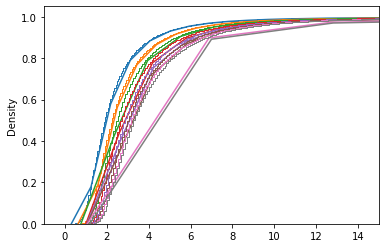

In [93]:
## Distribución acumulada R
sns.histplot(data=R1,stat="density", element="step", fill=False,kde=True, label='1',cumulative=True,linewidth=1)
sns.histplot(data=R2,stat="density", element="step", fill=False,kde=True, label='2',cumulative=True,linewidth=1)
sns.histplot(data=R3,stat="density", element="step", fill=False,kde=True, label='3',cumulative=True,linewidth=1)
sns.histplot(data=R4,stat="density", element="step", fill=False,kde=True, label='4',cumulative=True,linewidth=1)
sns.histplot(data=R5,stat="density", element="step", fill=False,kde=True, label='5',cumulative=True,linewidth=1)
sns.histplot(data=R6,stat="density", element="step", fill=False,kde=True, label='6',cumulative=True,linewidth=1)
sns.histplot(data=R7,stat="density", element="step", fill=False,kde=True, label='7',cumulative=True,linewidth=1)
sns.histplot(data=R8,stat="density", element="step", fill=False,kde=True, label='8',cumulative=True,linewidth=1)
#plt.legend(['1','2','3','4','5','6','7','8'])
plt.xlim([-1,15])
#plt.ylim([0,0.6])

* Tabla de valores críticos del estadístico $R$

In [94]:
significancia = [1-.15,1-.10,1-.09,1-.08,1-.07,1-0.06,1-0.05,1-0.04,1-0.03,1-0.02,1-0.01]
tabla_valores = {}
tabla_valores[1] = np.quantile(R1, significancia)
tabla_valores[2] = np.quantile(R2, significancia)
tabla_valores[3] = np.quantile(R3, significancia)
tabla_valores[4] = np.quantile(R4, significancia)
tabla_valores[5] = np.quantile(R5, significancia)
tabla_valores[6] = np.quantile(R6, significancia)
tabla_valores[7] = np.quantile(R7, significancia)
tabla_valores[8] = np.quantile(R8, significancia)

In [95]:
len(significancia)

11

In [96]:
import pandas as pd
pd.DataFrame.from_dict(tabla_valores)

,1,2,3,4,5,6,7,8
0,3.597543,4.122725,4.525492,4.857600,5.136769,5.415943,5.649198,5.862339
1,4.279583,4.887033,5.333539,5.718398,6.050890,6.337374,6.605421,6.836232
2,4.471406,5.084102,5.568441,5.958258,6.287924,6.610439,6.874673,7.111639
3,4.699016,5.328292,5.834215,6.222879,6.576084,6.910282,7.178024,7.419989
4,4.954462,5.615743,6.137214,6.540706,6.914724,7.247601,7.548529,7.814829
5,5.258174,5.962233,6.492183,6.942778,7.307242,7.689682,8.018960,8.272237
6,5.650884,6.375424,6.962814,7.415501,7.839224,8.230171,8.547435,8.840000
7,6.150531,6.956938,7.545524,8.088534,8.517002,8.911481,9.258050,9.581509
8,6.868381,7.738833,8.425157,8.980571,9.437701,9.893134,10.275562,10.623630
9,8.000601,8.993003,9.763884,10.357151,10.935532,11.426233,11.856356,12.269652


In [ ]:
## Empezando con 15 y acabando con 1

* Tracy Widom numérica

Text(0.5, 0.98, 'F2 y f2')

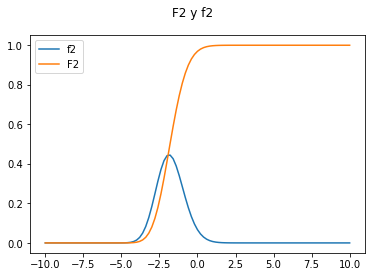

In [20]:
import numpy as np
from TracyWidom import TracyWidom

x = np.linspace(-10, 10, 101)
tw1 = TracyWidom(beta=2)  # allowed beta values are 1, 2, and 4
pdf = tw1.pdf(x)
cdf = tw1.cdf(x)
plt.plot(x, pdf,label='f2')
plt.plot(x, cdf,label='F2')
plt.legend(['f2', 'F2'])
plt.suptitle('F2 y f2')